In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read the dataset
data=pd.read_csv('/content/train.csv')

Exploratory data analysis

In [ ]:
# first look at the shape of the dataset
data.shape

(13994, 30)

In [ ]:
data.head()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


Feature Names and its Datatypes

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

Data Splitting

Select and separately store Numerical and Categorical features in different variables

In [ ]:
##Selecting numerical features
numerical_data = data.select_dtypes(include='number')
#append the features of numerical_data to list
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 21 numerical features: 

['age', 'ball_controlling_skills', 'body_reflexes', 'body_balance', 'jumping_skills', 'penalties_conversion_rate', 'mental_strength', 'goalkeeping_skills', 'defending_skills', 'passing_skills', 'dribbling_skills', 'shot_accuracy', 'body_strength_stamina', 'max_running_speed', 'behaviour_rating', 'matches_played', 'fitness_rating', 'trophies_won', 'years_of_experience', 'no_of_disqualifications', 'selection']


In [ ]:
#Selecting categoricalfeatures
categorical_data=data.select_dtypes(include= 'object')
#append the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 9 categorical features: 

['player_id', 'name', 'gender', 'country', 'height', 'weight', 'strong_foot', 'dedication_level', 'coaching']


Descriptive Analysis

In descriptive Analysis we analyse each variable separately to get inference about the feature.

In [ ]:
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,13994.0,21.135844,5.162719,16.0,17.0,20.0,24.0,61.0
ball_controlling_skills,13581.0,56.043958,16.787353,5.0,51.0,61.0,67.0,95.0
body_reflexes,13994.0,61.934329,14.931963,12.0,54.0,64.0,72.0,96.0
body_balance,13994.0,62.753323,14.203638,9.0,55.0,65.0,73.0,97.0
jumping_skills,13970.0,63.612026,11.938712,14.0,57.0,64.0,72.0,95.0
penalties_conversion_rate,13964.0,48.495703,15.767506,7.0,39.0,49.0,60.0,92.0
mental_strength,13966.0,56.768366,11.977744,9.0,49.0,58.0,65.0,92.0
goalkeeping_skills,13994.0,16.474632,16.874551,1.0,10.0,11.0,12.0,88.0
defending_skills,13994.0,48.108118,16.821929,9.0,36.0,52.0,61.0,86.0
passing_skills,13994.0,52.935973,14.201782,13.0,45.0,56.0,63.0,89.0


In [ ]:
#Summary satistics of Categorical features
categorical_data.describe(include='object').T

,count,unique,top,freq
player_id,13994,13994,PLID_4964,1
name,13994,13994,Keva Horan,1
gender,13975,2,M,6992
country,13994,163,England,1157
height,13994,31,6'0,2251
weight,13577,88,165lbs,1106
strong_foot,13442,4,Right,8359
dedication_level,13994,3,Medium,9704
coaching,13869,4,Academy,9390


In [ ]:
#Variance of each numerical features
numerical_data.var()

age                            26.653667
ball_controlling_skills       281.815225
body_reflexes                 222.963528
body_balance                  201.743334
jumping_skills                142.532836
penalties_conversion_rate     248.614248
mental_strength               143.466356
goalkeeping_skills            284.750482
defending_skills              282.977304
passing_skills                201.690605
dribbling_skills               94.775075
shot_accuracy                 249.766118
body_strength_stamina         132.538259
max_running_speed              26.981653
behaviour_rating                1.200563
matches_played                184.504114
fitness_rating                  2.913789
trophies_won                    2.921202
years_of_experience            19.810993
no_of_disqualifications      5187.406983
selection                       0.246709
dtype: float64

In [ ]:
#Skew in numerical features
numerical_data.skew()

age                           2.177334
ball_controlling_skills      -1.216855
body_reflexes                -0.575091
body_balance                 -0.603426
jumping_skills               -0.423145
penalties_conversion_rate    -0.371393
mental_strength              -0.462343
goalkeeping_skills            2.502611
defending_skills             -0.522252
passing_skills               -0.623124
dribbling_skills             -1.040802
shot_accuracy                -0.664315
body_strength_stamina        -0.602096
max_running_speed            -0.849923
behaviour_rating             -0.114917
matches_played                4.361512
fitness_rating               -0.883006
trophies_won                  0.126066
years_of_experience           0.661366
no_of_disqualifications     -13.725532
selection                    -0.231662
dtype: float64

Observation

1.Features such as age,goalkeeping_skills,matches_played and  have high positive skew ranges.

2.And no_of_disqualifications has high negative skew.

3.Rest of features shows moderate range of positive and negative skew.

Histograms

To find the distributions in  each feature

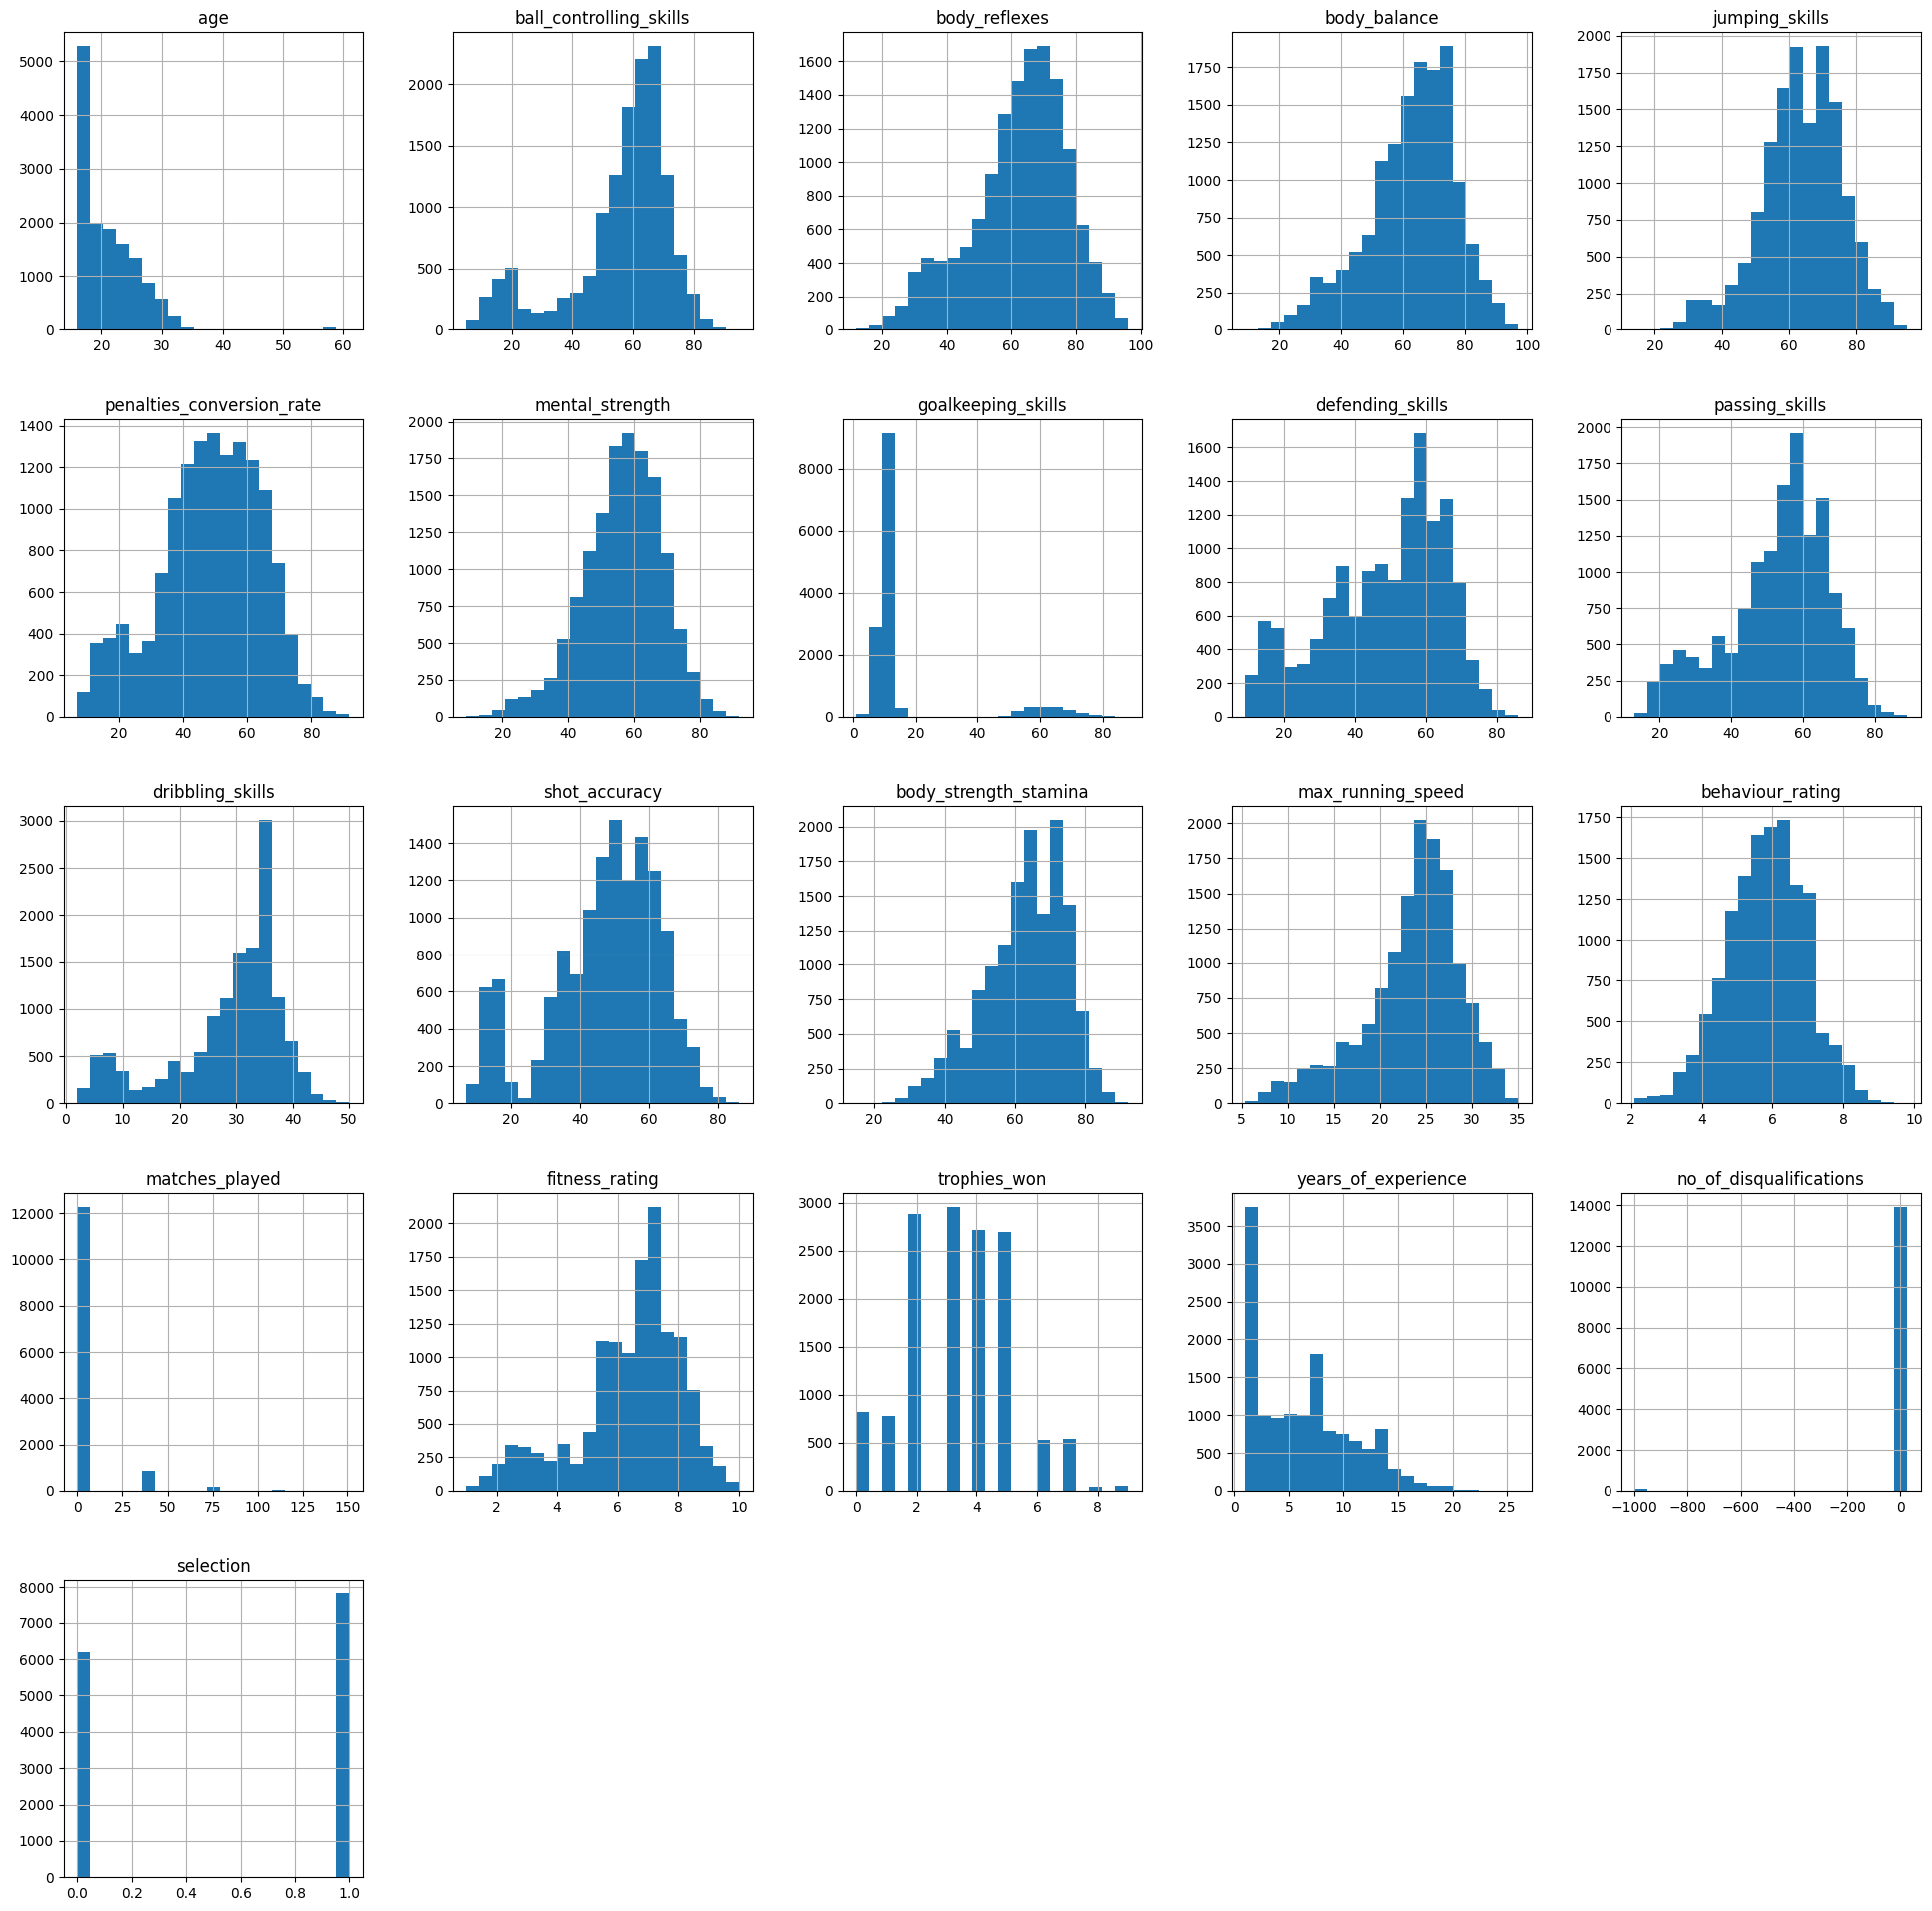

In [ ]:
numerical_data.hist(figsize=(24,24),bins=21)
plt.show()

Number Unique values in each feature

In [ ]:
numerical_data.nunique()

age                           39
ball_controlling_skills       89
body_reflexes                 84
body_balance                  86
jumping_skills                74
penalties_conversion_rate     86
mental_strength               83
goalkeeping_skills            65
defending_skills              78
passing_skills                77
dribbling_skills              48
shot_accuracy                 79
body_strength_stamina         73
max_running_speed            166
behaviour_rating              64
matches_played                18
fitness_rating                85
trophies_won                  10
years_of_experience           25
no_of_disqualifications       17
selection                      2
dtype: int64

In [ ]:
categorical_data.nunique()

player_id           13994
name                13994
gender                  2
country               163
height                 31
weight                 88
strong_foot             4
dedication_level        3
coaching                4
dtype: int64

Denity plot of numerical features

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

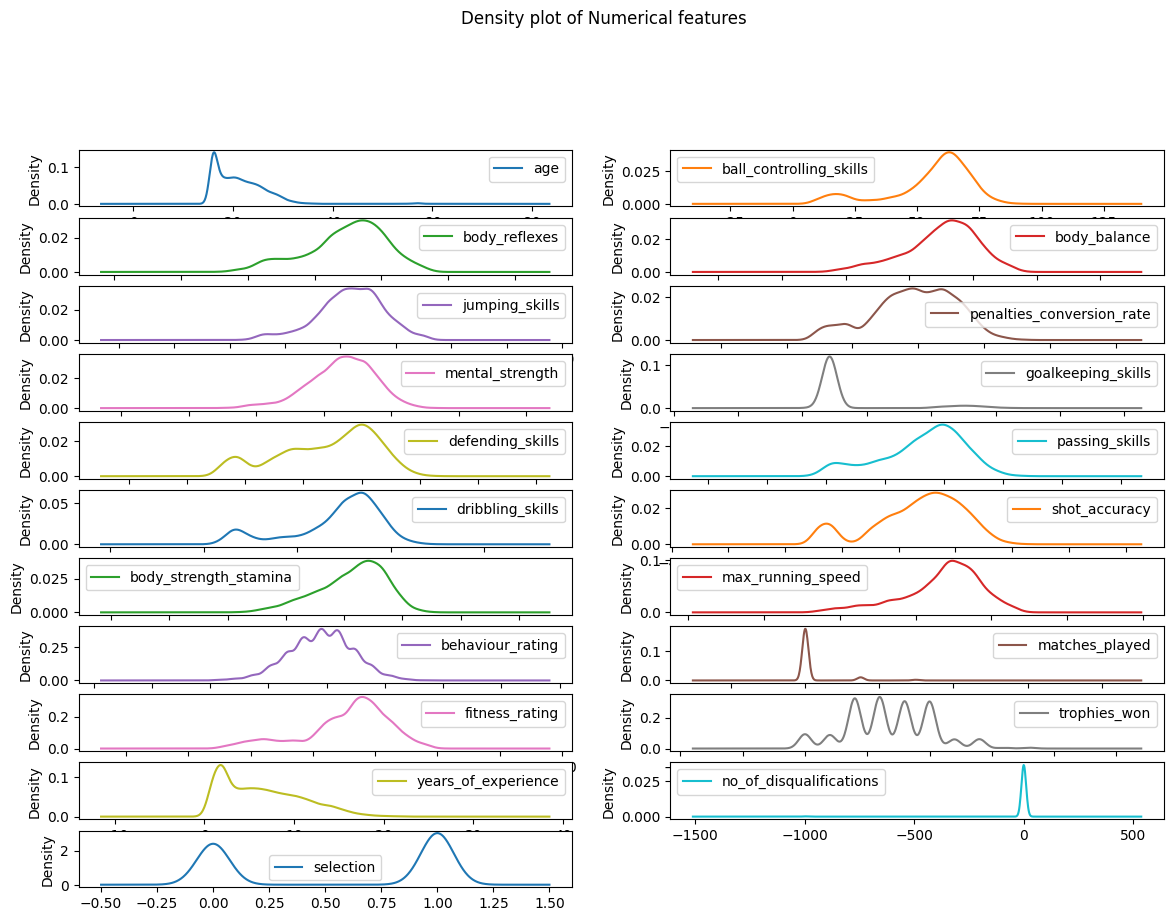

In [ ]:
numerical_data.plot(kind='density',figsize=(14,14),subplots=True,layout=(16,2),title="Density plot of Numerical features",sharex=False)

Observations

1.Most of the features show skewed like distribution.

2.Categorical features such as player id and name has unique values.

Correlation Analysis

Correlation matrix of whole dataset

In [ ]:
# Generating correlation coefficient between each features
from pandas import set_option
set_option("display.precision",3)
correlation=data.corr()
correlation

<ipython-input-17-8e2295e8676a>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=data.corr()


,age,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,...,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications,selection
age,1.000,0.083,-0.009,-0.058,0.144,0.124,0.315,0.077,0.157,0.154,...,0.149,0.201,-0.131,0.374,0.211,0.079,0.031,0.841,-0.011,-0.162
ball_controlling_skills,0.083,1.000,0.702,0.604,0.205,0.770,0.698,-0.788,0.600,0.897,...,0.897,0.552,0.685,0.457,0.213,0.724,0.272,0.092,-0.008,0.266
body_reflexes,-0.009,0.702,1.000,0.761,0.226,0.564,0.450,-0.537,0.297,0.672,...,0.657,0.276,0.798,0.284,0.088,0.572,0.236,-0.021,-0.016,0.163
body_balance,-0.058,0.604,0.761,1.000,0.201,0.486,0.338,-0.520,0.289,0.584,...,0.542,0.129,0.687,0.159,0.041,0.483,0.198,-0.075,-0.013,0.101
jumping_skills,0.144,0.205,0.226,0.201,1.000,0.136,0.264,-0.205,0.326,0.158,...,0.187,0.404,0.245,0.267,0.113,0.363,0.057,0.156,-0.011,0.085
penalties_conversion_rate,0.124,0.770,0.564,0.486,0.136,1.000,0.569,-0.632,0.306,0.691,...,0.873,0.392,0.543,0.354,0.213,0.519,0.248,0.142,-0.012,0.177
mental_strength,0.315,0.698,0.450,0.338,0.264,0.569,1.000,-0.424,0.522,0.712,...,0.685,0.529,0.384,0.665,0.363,0.544,0.228,0.368,-0.002,0.319
goalkeeping_skills,0.077,-0.788,-0.537,-0.520,-0.205,-0.632,-0.424,1.000,-0.660,-0.661,...,-0.718,-0.546,-0.626,-0.079,-0.005,-0.704,-0.177,0.098,0.014,-0.047
defending_skills,0.157,0.600,0.297,0.289,0.326,0.306,0.522,-0.660,1.000,0.637,...,0.465,0.680,0.335,0.390,0.157,0.700,0.100,0.178,0.001,0.154
passing_skills,0.154,0.897,0.672,0.584,0.158,0.691,0.712,-0.661,0.637,1.000,...,0.849,0.501,0.595,0.513,0.255,0.686,0.265,0.179,-0.008,0.258


<ipython-input-19-0b340f94ab16>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), ax=ax, annot=True)


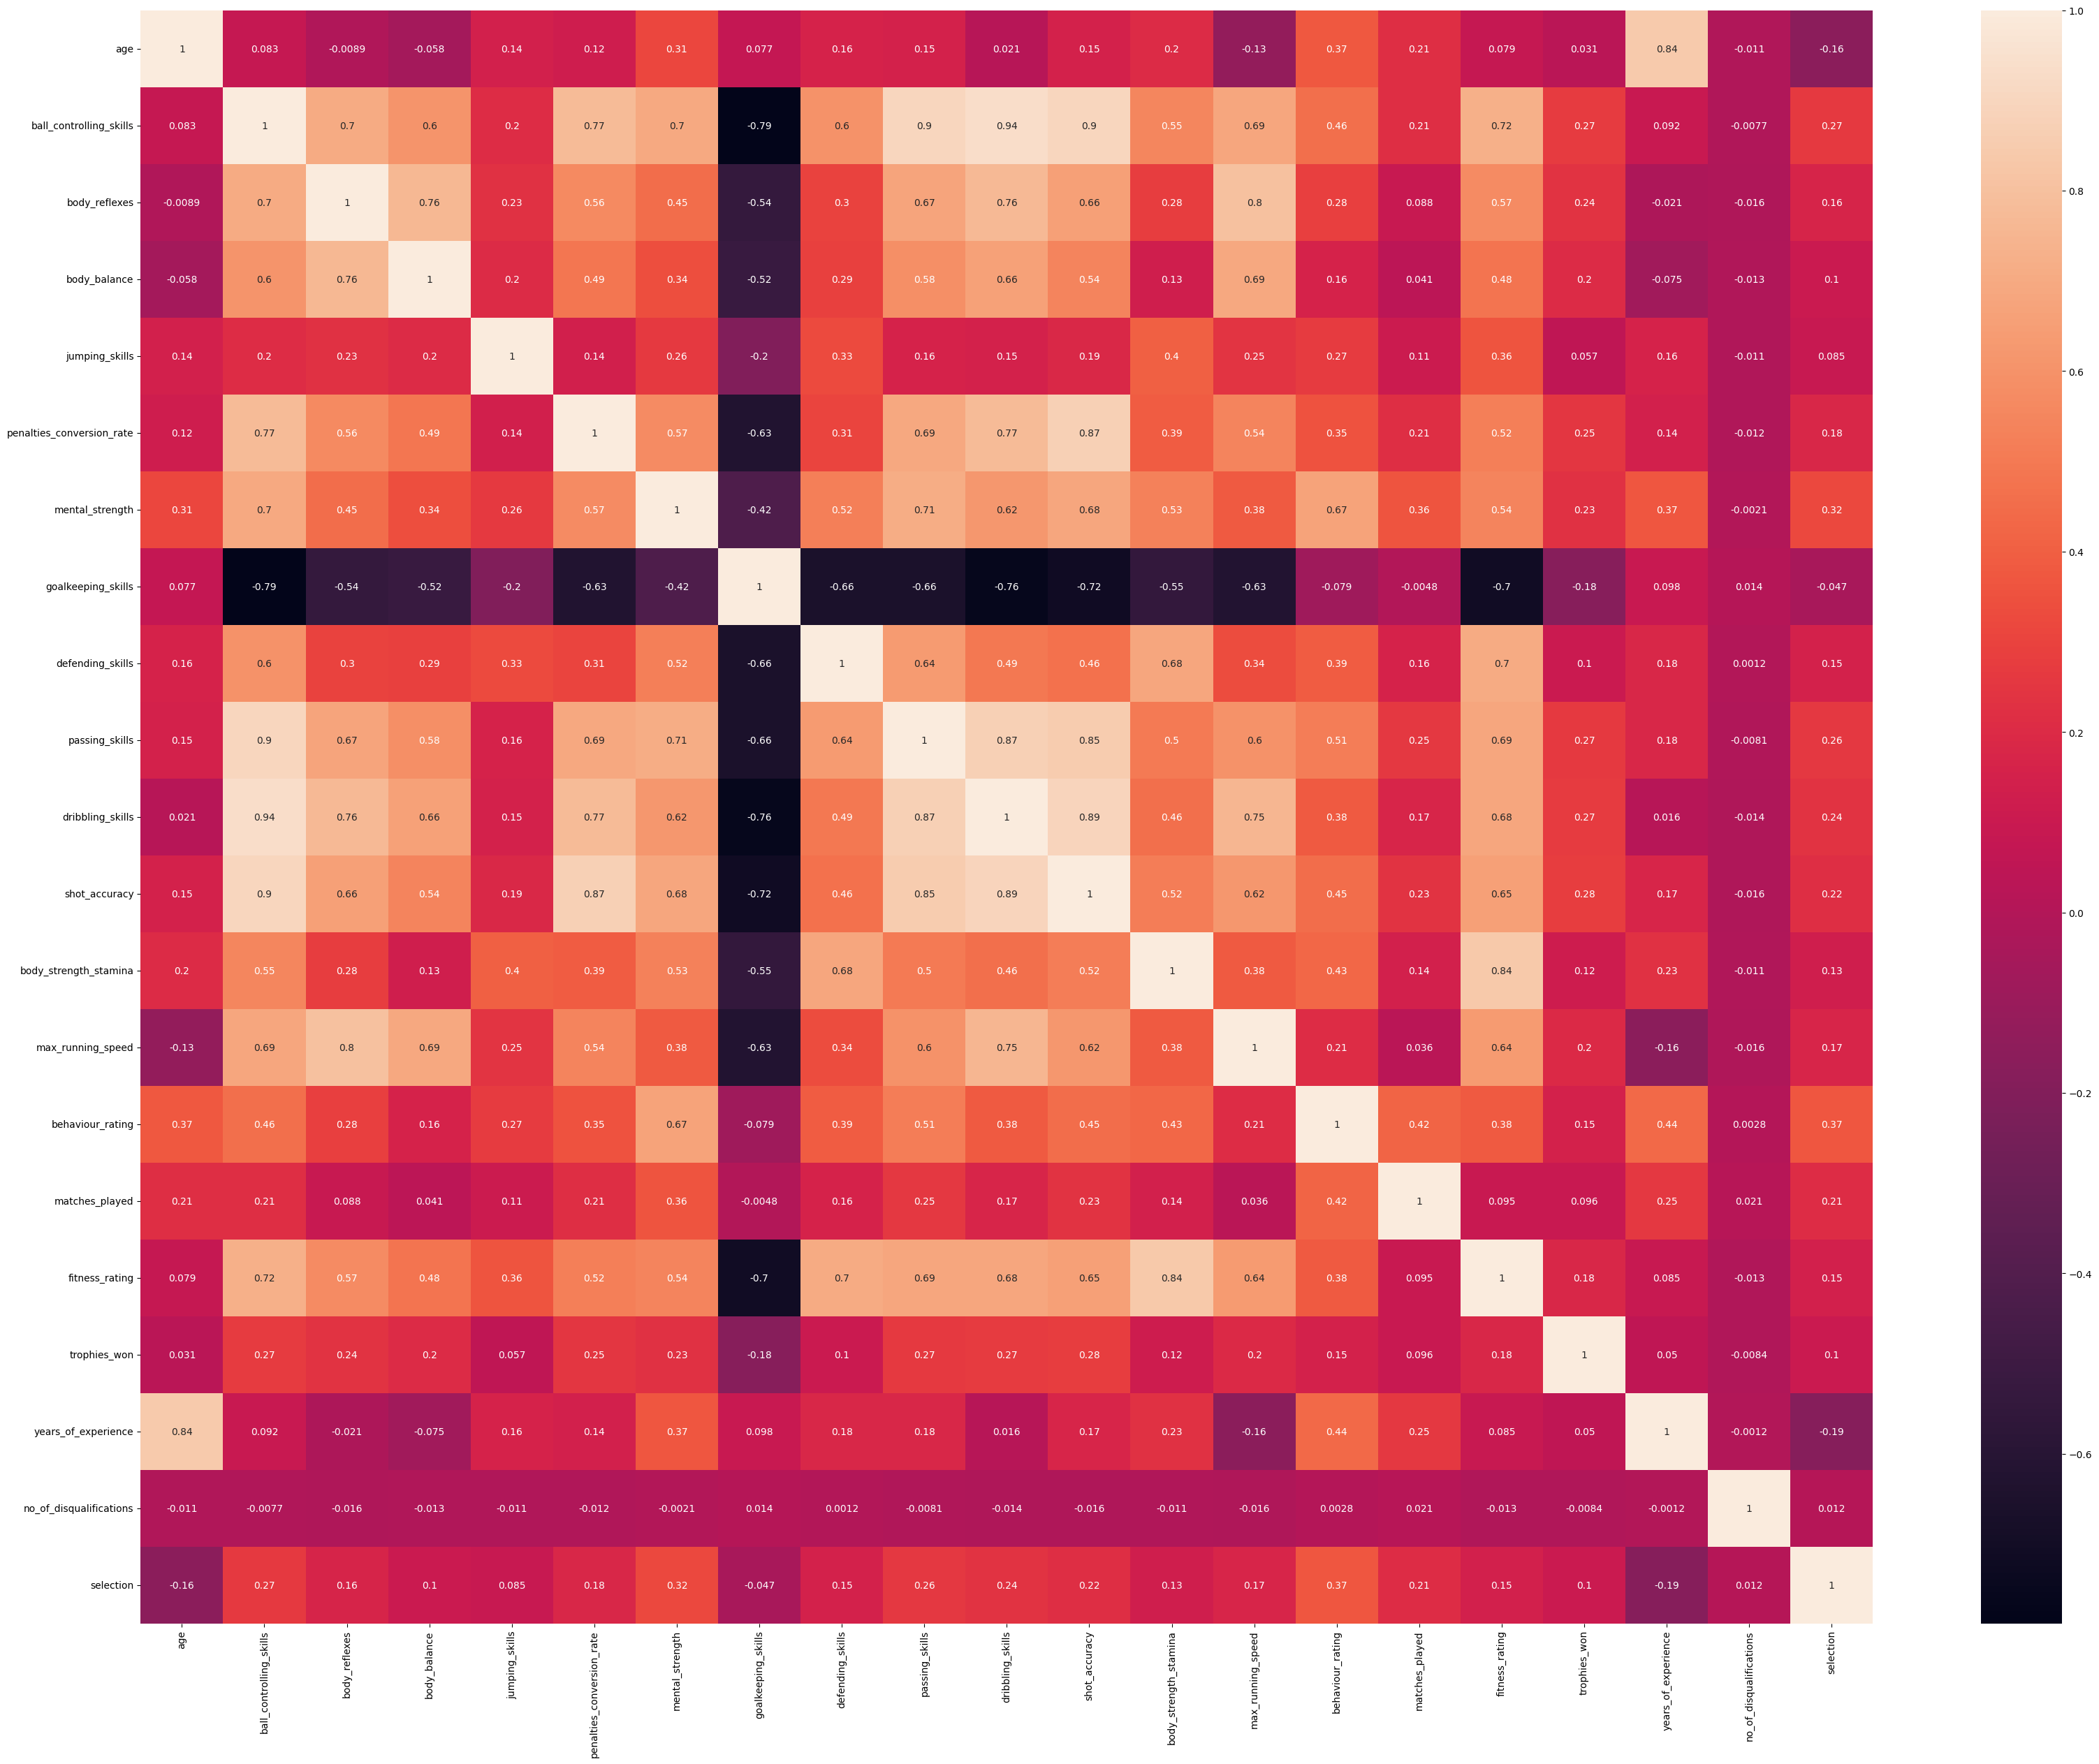

In [ ]:
#Correlation Heatmap plot of whole dataset
# Plot correlation matrix in heatmap
fig, ax = plt.subplots(figsize=(40, 30))
sns.heatmap(data.corr(), ax=ax, annot=True)
plt.show()

Data Preprocessing

Check for missing values in numerical features

In [ ]:
numerical_data.isnull().sum()

age                            0
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int64

In [ ]:
# since most of the features show moderate skew value,we fill missing values with median.

In [ ]:
for i in ['ball_controlling_skills', 'jumping_skills', 'penalties_conversion_rate','mental_strength','shot_accuracy','behaviour_rating','matches_played','fitness_rating','years_of_experience']:
  numerical_data[i]=numerical_data[i].fillna(numerical_data[i].median())

In [ ]:
numerical_data.isnull().sum()

age                          0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dtype: int64

In [ ]:
# for categorical features
categorical_data.isnull().sum()

player_id             0
name                  0
gender               19
country               0
height                0
weight              417
strong_foot         552
dedication_level      0
coaching            125
dtype: int64

In [ ]:
# in categorical columns,we fill null values with the mode
for i in ['gender', 'weight', 'strong_foot', 'coaching']:
    categorical_data[i] = categorical_data[i].fillna(categorical_data[i].mode()[0])

In [ ]:
categorical_data.isnull().sum()

player_id           0
name                0
gender              0
country             0
height              0
weight              0
strong_foot         0
dedication_level    0
coaching            0
dtype: int64

Missing values in the dataset is solved

Managing Outliers

In [ ]:
# Define a function to detect outliers using Z-score
def find_outliers_zscore(numerical_data, threshold=3):
    z_scores = np.abs((numerical_data - numerical_data.mean()) / numerical_data.std())
    return z_scores > threshold

In [ ]:
# find outliers in all columns
outliers_all_columns = numerical_data.apply(find_outliers_zscore)

In [ ]:
# Show the rows where any column has an outlier
outliers_rows = outliers_all_columns.any(axis=1)
outliers_detected = numerical_data[outliers_rows]

In [ ]:
# Get the index of potential outliers
potential_outliers_index = outliers_detected.index

In [ ]:
potential_outliers_index

Int64Index([    3,    32,    57,    58,    75,    79,    86,   122,   130,
              133,
            ...
            13894, 13905, 13906, 13920, 13923, 13933, 13945, 13954, 13964,
            13969],
           dtype='int64', length=1103)

In [ ]:
# Remove the potential outliers from the original DataFrame
df_cleaned = data.drop(index=potential_outliers_index)

In [ ]:
# After removing outliers and storing the cleaned DataFrame in 'df_cleaned'
# Reset the index of the DataFrame
df_cleaned.reset_index(drop=True, inplace=True)

In [ ]:
df_cleaned

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0
4,PLID_10351,Tandra Tijerina,21,M,Guinea,6'0,174lbs,63.0,69.0,65.0,...,Right,6.3,0.0,6.9,3.0,Medium,Academy,7.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12886,PLID_10956,Viva Stepney,20,M,Uruguay,6'0,161lbs,60.0,48.0,62.0,...,Right,6.0,NaN,7.6,2.0,Medium,Academy,6.0,0.0,1
12887,PLID_17290,Illa Pitre,18,F,England,5'10,165lbs,53.0,68.0,59.0,...,Right,5.3,0.0,5.6,3.0,Medium,Academy,4.0,0.0,0
12888,PLID_5193,Marylouise Mosley,17,M,Japan,6'0,172lbs,56.0,73.0,62.0,...,Left,5.7,0.0,7.7,3.0,Low,Talent Hunt,2.0,0.0,1
12889,PLID_12173,Teri Escamilla,20,F,Ukraine,5'10,150lbs,71.0,69.0,70.0,...,Left,6.8,1.0,5.8,4.0,Medium,Academy,6.0,0.0,1


Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [ ]:
categorical_data.columns

Index(['player_id', 'name', 'gender', 'country', 'height', 'weight',
       'strong_foot', 'dedication_level', 'coaching'],
      dtype='object')

In [ ]:
df_cleaned['player_id'] = le.fit_transform(df_cleaned['player_id'])
df_cleaned['name'] = le.fit_transform(df_cleaned['name'])
df_cleaned['gender'] = le.fit_transform(df_cleaned['gender'])
df_cleaned['country'] = le.fit_transform(df_cleaned['country'])
df_cleaned['height'] = le.fit_transform(df_cleaned['height'])
df_cleaned['weight'] = le.fit_transform(df_cleaned['weight'])
df_cleaned['strong_foot'] = le.fit_transform(df_cleaned['strong_foot'])
df_cleaned['dedication_level'] = le.fit_transform(df_cleaned['dedication_level'])
df_cleaned['coaching'] = le.fit_transform(df_cleaned['coaching'])

In [ ]:
df_cleaned.head()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,9812,6432,23,1,152,18,47,77.0,58.0,47.0,...,3,7.7,NaN,8.1,2.0,0,2,8.0,0.0,1
1,759,4991,18,1,123,5,24,54.0,69.0,70.0,...,0,5.3,0.0,NaN,3.0,2,1,3.0,0.0,0
2,5643,3277,16,0,134,18,44,34.0,43.0,45.0,...,1,4.7,0.0,6.6,5.0,1,0,2.0,0.0,1
3,12685,5745,19,0,5,13,32,47.0,61.0,74.0,...,3,NaN,0.0,5.7,5.0,2,0,4.0,0.0,0
4,221,11978,21,1,63,15,46,63.0,69.0,65.0,...,3,6.3,0.0,6.9,3.0,2,0,7.0,0.0,0


In [ ]:
df_cleaned.isnull().sum()

player_id                      0
name                           0
age                            0
gender                         0
country                        0
height                         0
weight                         0
ball_controlling_skills      378
body_reflexes                  0
body_balance                   0
jumping_skills                22
penalties_conversion_rate     29
mental_strength               24
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                529
body_strength_stamina          0
max_running_speed              0
strong_foot                    0
behaviour_rating             658
matches_played               620
fitness_rating               632
trophies_won                   0
dedication_level               0
coaching                       0
years_of_experience          138
no_of_disqualifications        0
selection                      0
dtype: int

Min Max scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Create the MinMaxScaler object
scaler = MinMaxScaler()

In [ ]:
# splitting the dataset
# List of columns to drop
columns_to_drop = ['player_id', 'name', 'selection']

# Create the new DataFrame x by dropping the specified columns
x = df_cleaned.drop(columns=columns_to_drop)

In [ ]:
y = df_cleaned['selection']

In [ ]:
# Fit and transform the data to perform Min-Max scaling
x_scaled = scaler.fit_transform(x)

In [ ]:
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)

In [ ]:
x_scaled.head()

,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,...,max_running_speed,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications
0,0.389,0.5,0.944,0.600,0.547,0.843,0.513,0.342,0.470,0.402,...,0.604,0.75,0.820,NaN,0.776,0.250,0.0,0.50,0.389,0.0
1,0.111,0.5,0.764,0.167,0.279,0.566,0.654,0.645,0.515,0.549,...,0.537,0.00,0.426,0.0,NaN,0.375,1.0,0.25,0.111,0.0
2,0.000,0.0,0.832,0.600,0.512,0.325,0.321,0.316,0.621,0.500,...,0.560,0.25,0.328,0.0,0.600,0.625,0.5,0.00,0.056,0.0
3,0.167,0.0,0.031,0.433,0.372,0.482,0.551,0.697,0.439,0.500,...,0.567,0.75,NaN,0.0,0.494,0.625,1.0,0.00,0.167,0.0
4,0.278,0.5,0.391,0.500,0.535,0.675,0.654,0.579,0.561,0.573,...,0.828,0.75,0.590,0.0,0.635,0.375,1.0,0.00,0.333,0.0


In [ ]:
# train test split
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

Modelling

As it is a classification problem,we can chose random forest classifier since it handles the dataset very well

Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
x_scaled.isnull().sum()

age                            0
gender                         0
country                        0
height                         0
weight                         0
ball_controlling_skills      378
body_reflexes                  0
body_balance                   0
jumping_skills                22
penalties_conversion_rate     29
mental_strength               24
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                529
body_strength_stamina          0
max_running_speed              0
strong_foot                    0
behaviour_rating             658
matches_played               620
fitness_rating               632
trophies_won                   0
dedication_level               0
coaching                       0
years_of_experience          138
no_of_disqualifications        0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

In [ ]:
d['heart_rate'] = imputer.fit_transform(dataset[['heart_rate']])

In [ ]:
x_scaled.isnull().sum()

age                            0
gender                         0
country                        0
height                         0
weight                         0
ball_controlling_skills      378
body_reflexes                  0
body_balance                   0
jumping_skills                22
penalties_conversion_rate     29
mental_strength               24
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                529
body_strength_stamina          0
max_running_speed              0
strong_foot                    0
behaviour_rating             658
matches_played               620
fitness_rating               632
trophies_won                   0
dedication_level               0
coaching                       0
years_of_experience          138
no_of_disqualifications        0
dtype: int64

In [ ]:
# Train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

ValueError: ignored